In [1]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot

In [2]:
train = pandas.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
features = train[['Pclass', 'Sex', 'SibSp', 'Parch']]
print(features.shape)

(891, 4)


In [4]:
output = train['Survived']
print(output.shape)

(891,)


In [5]:
#Split Train and Test set
featuresTrain, featuresTest, outputTrain, outputTest = train_test_split(features, output, random_state = 0)

In [6]:
#Encoding
encoder = LabelEncoder()

featuresTrain['Sex'] = encoder.fit_transform(featuresTrain['Sex'])
featuresTest['Sex'] = encoder.transform(featuresTest['Sex'])

c:\users\ideas2it\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\ideas2it\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [7]:
#Feature Scaling
scaler = MinMaxScaler()

featuresTrain = scaler.fit_transform(featuresTrain)
featuresTest = scaler.transform(featuresTest)

c:\users\ideas2it\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
#Logistic Regression
model = LogisticRegression()
model.fit(featuresTrain, outputTrain)

outputPredict = model.predict(featuresTest)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(model.score(featuresTrain, outputTrain)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(model.score(featuresTest, outputTest)))

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.78


c:\users\ideas2it\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.         0.16546763 1.        ] [0.         0.70238095 1.        ]


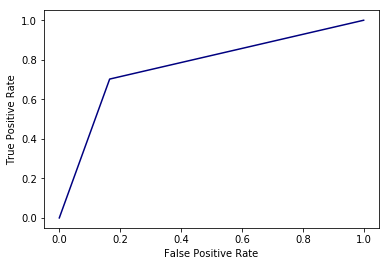

In [9]:
#ROC Curve
falsePositive, truePositive, threshold = roc_curve(outputTest, outputPredict)

print(falsePositive, truePositive)

pyplot.plot(falsePositive, truePositive, color='navy')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

In [10]:
# Confusion matrix
trueNegative, falsePositive, falseNegative, truePositive = confusion_matrix(outputTest, outputPredict).ravel()

print('True Negative: {:.2f}'.format(trueNegative))
print('False Positive: {:.2f}'.format(falsePositive))
print('False Negative: {:.2f}'.format(falseNegative))
print('True Positive: {:.2f}'.format(truePositive))

True Negative: 116.00
False Positive: 23.00
False Negative: 25.00
True Positive: 59.00


In [11]:
def getConfusionMatrix(test, predict):
    predictFlag = {'1': 'P', '0': 'N'}[str(predict)]
    testFlag = 'T' if test == predict else 'F'
    return testFlag + predictFlag

In [12]:
# Confusion matrix - Manual Calculation
confMatrix = pandas.Series()

for index in range(len(outputTest)):
    confMatrix.at[index] = getConfusionMatrix(outputTest.values[index], outputPredict[index])
print(confMatrix.value_counts())

TN    116
TP     59
FN     25
FP     23
dtype: int64


In [13]:
matrixValues = confMatrix.value_counts()
accuracy = (matrixValues['TP'] + matrixValues['TN']) / (matrixValues['TP'] + matrixValues['TN'] + matrixValues['FP'] + matrixValues['FN'])
sensitivity = matrixValues['TP'] / (matrixValues['TP'] + matrixValues['FN'])
specificity = matrixValues['TN'] / (matrixValues['TN'] + matrixValues['FP'])
precision = matrixValues['TP'] / (matrixValues['TP'] + matrixValues['FP'])

print('Accuracy: {:.2f}'.format(accuracy))
print('True Positive Rate or Sensitivity: {:.2f}'.format(sensitivity))
print('True Negative Rate or Specificity: {:.2f}'.format(specificity))
print('Precision: {:.2f}'.format(precision))

Accuracy: 0.78
True Positive Rate or Sensitivity: 0.70
True Negative Rate or Specificity: 0.83
Precision: 0.72


In [14]:
#KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(featuresTrain, outputTrain)

outputPredict = knn.predict(featuresTest)

print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(featuresTest, outputTest)))

Accuracy of KNN classifier on test set: 0.78


In [15]:
#Linear SVM
svm = SVC(kernel='linear')
svm.fit(featuresTrain, outputTrain)

print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(featuresTrain, outputTrain)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(featuresTest, outputTest)))

Accuracy of SVM classifier on training set: 0.79
Accuracy of SVM classifier on test set: 0.78


In [16]:
#RBF Kernal SVM
rbf = SVC(kernel='rbf')
rbf.fit(featuresTrain, outputTrain)

print('Accuracy of RBF SVM classifier on training set: {:.2f}'.format(rbf.score(featuresTrain, outputTrain)))
print('Accuracy of RBF SVM classifier on test set: {:.2f}'.format(rbf.score(featuresTest, outputTest)))

Accuracy of RBF SVM classifier on training set: 0.79
Accuracy of RBF SVM classifier on test set: 0.78


c:\users\ideas2it\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
#K-Fold Cross Validation
kf = KFold(n_splits=4)

for trainIndex, testIndex in kf.split(features):
    featuresTrain, featuresTest = features.iloc[trainIndex], features.iloc[testIndex]
    outputTrain, outputTest = output[trainIndex], output[testIndex]
    
    featuresTrain['Sex'] = encoder.fit_transform(featuresTrain['Sex'])
    model.fit(featuresTrain, outputTrain)

    print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(model.score(featuresTrain, outputTrain)))


c:\users\ideas2it\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ideas2it\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on training set: 0.79


c:\users\ideas2it\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ideas2it\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ideas2it\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\us